In [28]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = [12.0/2, 8.0/2]

Adding the data for Y1, Y2, and Y3

In [20]:
filename = './data/homework_1_data_Y1.csv'
Y1 = np.genfromtxt(filename, delimiter=',')
filename = './data/homework_1_data_Y2.csv'
Y2 = np.genfromtxt(filename, delimiter=',')
filename = './data/homework_1_data_Y3.csv'
Y3 = np.genfromtxt(filename, delimiter=',')


In [21]:
Y1_day_index = np.arange(0, np.size(Y1), 1) / 24
Y1_hour_index = np.arange(0, np.size(Y1), 1)
Y2_day_index = np.arange(0, np.size(Y2), 1) / 24
Y2_hour_index = np.arange(0, np.size(Y2), 1)
np.shape(Y2)
np.shape(Y3)

(637,)

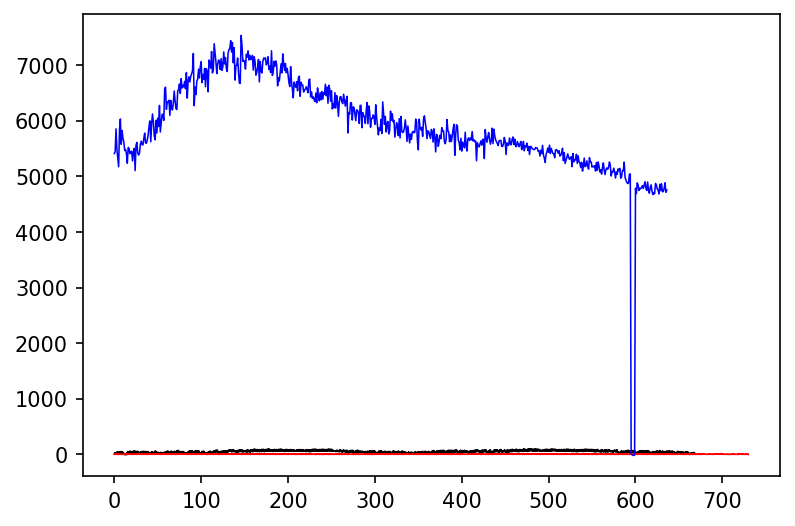

In [22]:
plt.figure()
plt.plot(Y1_day_index, Y1, linewidth=0.75, color='k')
plt.plot(Y2_day_index, Y2, linewidth=0.75, color='r')
plt.plot(Y3, linewidth=0.75, color='b')

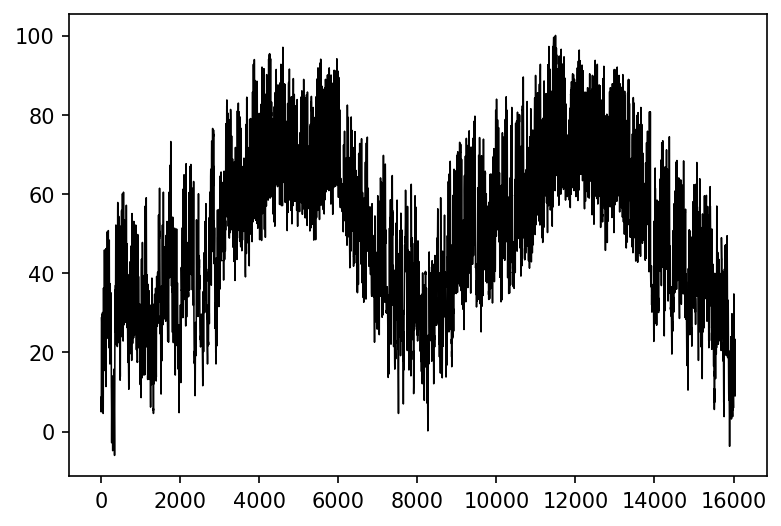

In [23]:
plt.figure()
plt.plot(Y1_hour_index, Y1, linewidth=0.75, color='k')

Standardizing the data

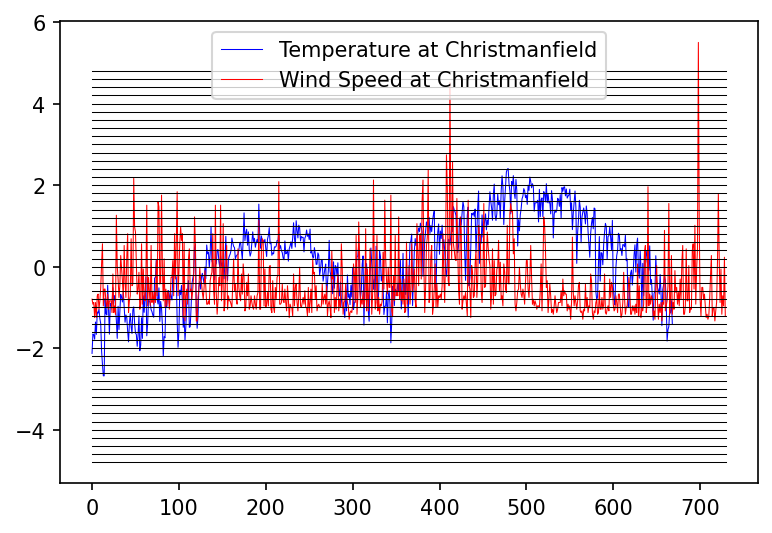

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
v1 = np.std(Y1)
v2 = np.std(Y2)
v3 = np.std(Y3)
Y1_s = (Y1 - np.mean(Y1)) / v1
Y2_s = (Y2 - np.mean(Y2)) / v2
Y3_s = (Y3 - np.mean(Y3)) / v3
plt.plot(Y1_day_index[::24], Y1_s[::24], linewidth=0.5, color='b', label= 'Temperature at Christmanfield')
plt.plot(Y2_day_index[::24], Y2_s[::24], linewidth=0.5, color='r', label= 'Wind Speed at Christmanfield')
plt.legend()
xinc = 0.2
xmin = -5
xmax = 5
bins = np.arange(xmin, xmax, xinc)
for ind, val in enumerate(bins[1:]):
    ax.plot([0, max(Y1_day_index [-1],Y2_day_index[-1])], [val, val], linewidth=0.5, color='k')

(-4.0, 4.0)

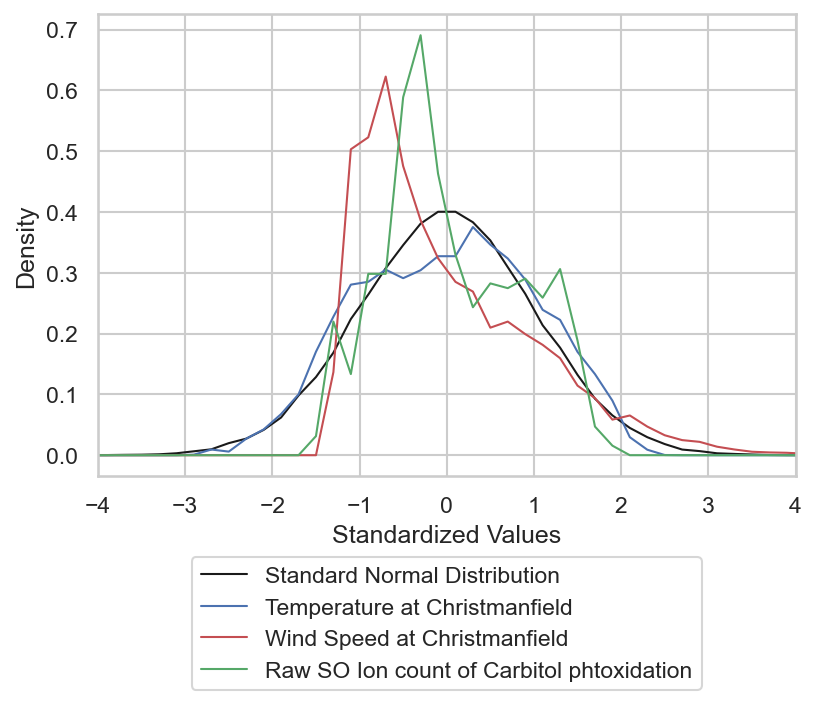

In [36]:
Z = np.random.normal(0, 1, size = (100_000,))

h_Y1_s = np.histogram(Y1_s, bins)
h_Y2_s = np.histogram(Y2_s, bins)
h_Y3_s = np.histogram(Y3_s, bins)
h_Z = np.histogram(Z, bins)

fig = plt.figure()
xvals_1 = h_Y1_s[1][:-1]
xvals_2 = h_Y2_s[1][:-1]
xvals_3 = h_Y3_s[1][:-1] 
xvals_z = h_Z[1][:-1]

fvals_Y1 = h_Y1_s[0].astype(float) / (np.size(Y1_s)*xinc)
fvals_Y2 = h_Y2_s[0].astype(float) / (np.size(Y2_s)*xinc)
fvals_Y3 = h_Y3_s[0].astype(float) / (np.size(Y3_s)*xinc)
fvals_z = h_Z[0].astype(float) / (np.size(Z)*xinc)

plt.plot(xvals_z+xinc/2, fvals_z, linewidth=1, color='k', label= 'Standard Normal Distribution')
plt.plot(xvals_1+xinc/2, fvals_Y1, linewidth=1, color='b', label= 'Temperature at Christmanfield')
plt.plot(xvals_2+xinc/2, fvals_Y2, linewidth=1, color='r', label= 'Wind Speed at Christmanfield')
plt.plot(xvals_3+xinc/2, fvals_Y3, linewidth=1, color='g', label= 'Raw SO Ion count of Carbitol phtoxidation')
#show the legend on the bottom outside of the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
# plt.legend()
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.xlim(-4, 4)



In [37]:
[np.sum(fvals_Y1*xinc), np.sum(fvals_Y2*xinc), np.sum(fvals_Y3*xinc), np.sum(fvals_z*xinc)]

[0.9999999999999999,
 0.9994292237442924,
 0.9921507064364207,
 0.9999999999999999]

In [43]:
# integrate the density function to get the probability more than 2 standard deviations
# for Y1_s
index_Y1 = np.where(xvals_1 + xinc/2 > 2)[0]
area_Y1 = np.sum(fvals_Y1[index_Y1] * xinc)

# for Y2_s
index_Y2 = np.where(xvals_2 + xinc/2 > 2)[0]
area_Y2 = np.sum(fvals_Y2[index_Y2] * xinc)

# for Y3_s
index_Y3 = np.where(xvals_3 + xinc/2 > 2)[0]
area_Y3 = np.sum(fvals_Y3[index_Y3] * xinc)

# for Z
index_Z = np.where(xvals_z + xinc/2 > 2)[0]
area_Z = np.sum(fvals_z[index_Z] * xinc)

#print the results
# The porbability of the values being greater than 2
area_Y1, area_Y2, area_Y3, area_Z


(0.007792531637678449, 0.047031963470319633, 0.0, 0.02319)

0.97681

In [ ]:

[area_Y1, np.sum(fvals_Y2*xinc), np.sum(fvals_Y3*xinc), np.sum(fvals_z*xinc)]

In [ ]:
plt.figure()

hY1c = np.cumsum(h[0])
hyy = np.cumsum(hy[0])

plt.xlabel('value')
plt.ylabel('density')

plt.bar(hx[1][:-1],hxx.astype(float)/np.size(x),edgecolor = 'r', color = [], width = .3, linewidth = 2)
plt.bar(hy[1][:-1],hyy.astype(float)/np.size(y),edgecolor = 'k', color = [], width = .4, linewidth = 2)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

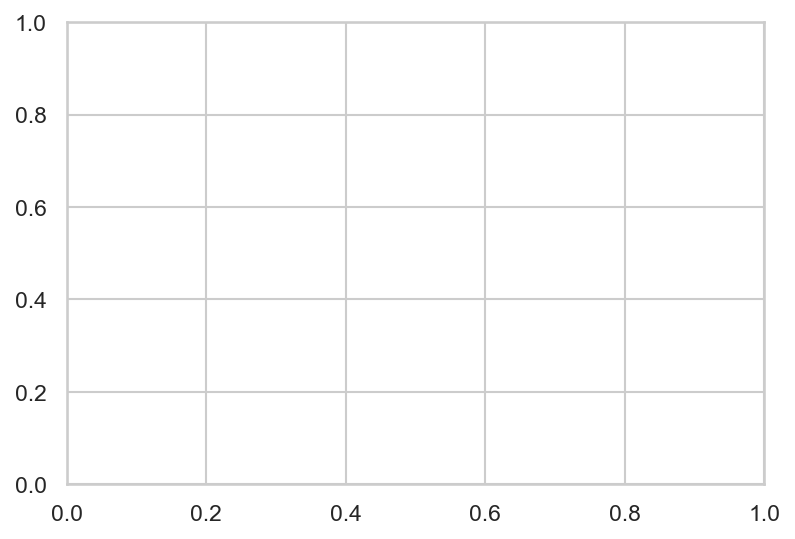

In [41]:
h_Y1_s_d = np.histogram(Y1_s, bins, density=True)
h_Y2_s_d = np.histogram(Y2_s, bins, density=True)
h_Y3_s_d = np.histogram(Y3_s, bins, density=True)
h_Z_d = np.histogram(Z, bins, density=True)

# plt.plot(xvals_z+xinc/2 , h_Z_d, linewidth=0.5, color='k', label= 'Standard Normal Distribution')
plt.plot(xvals_1+xinc/2, h_Y1_s_d, linewidth=0.5, color='b', label= 'Temperature at Christmanfield')
plt.plot(xvals_2+xinc/2, h_Y2_s_d, linewidth=0.5, color='r', label= 'Wind Speed at Christmanfield')
plt.plot(xvals_3+xinc/2, h_Y3_s_d, linewidth=0.5, color='g', label= 'Raw SO Ion count of Carbitol phtoxidation')
#show the legend on the bottom outside of the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
# plt.legend()
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.xlim(-4, 4)

Text(0, 0.5, 'Density')

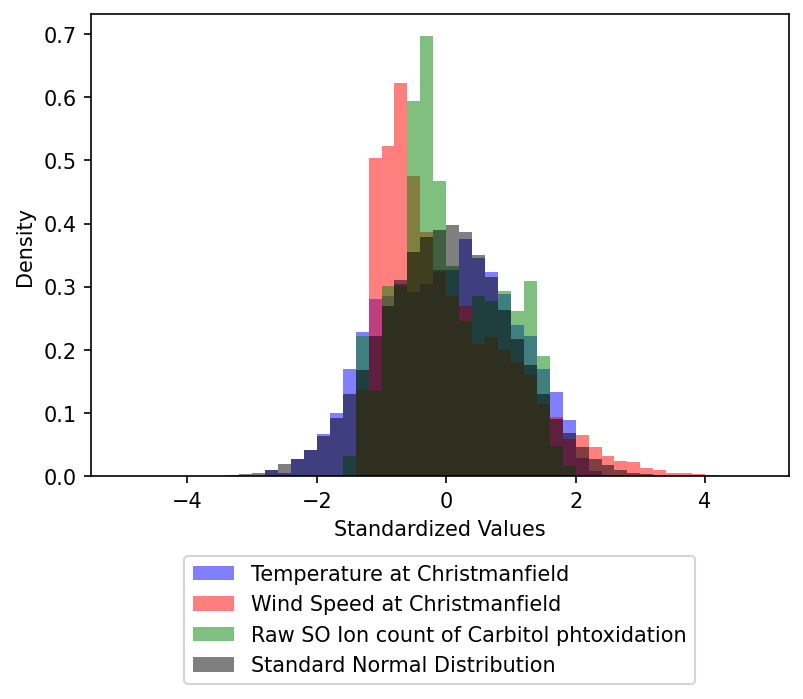

In [26]:
# plotting the histogram of the standardized values
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(Y1_s, bins, alpha=0.5, color='b', label='Temperature at Christmanfield', density=True)
plt.hist(Y2_s, bins, alpha=0.5, color='r', label='Wind Speed at Christmanfield', density=True)
plt.hist(Y3_s, bins, alpha=0.5, color='g', label='Raw SO Ion count of Carbitol phtoxidation', density=True)
plt.hist(Z, bins, alpha=0.5, color='k', label='Standard Normal Distribution', density=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.xlabel('Standardized Values')
plt.ylabel('Density')


C:\Users\masou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\masou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\masou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\masou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

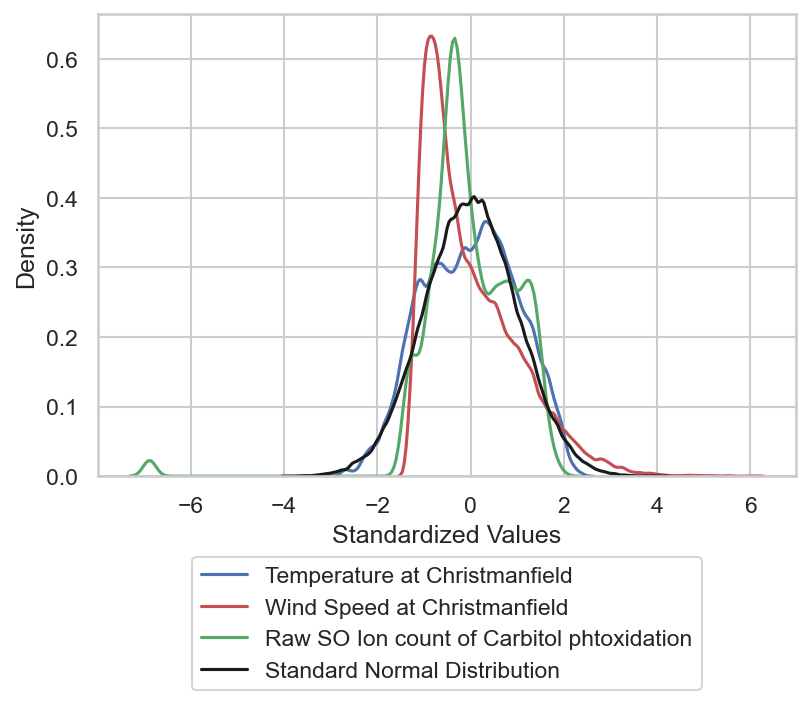

In [29]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

fig = plt.figure()
ax = fig.add_subplot(111)

# Use seaborn's distplot to plot KDEs.
# You might need to adjust the bandwidth (bw) for better smoothing.
sns.kdeplot(Y1_s, bw_adjust=0.5, color='b', label='Temperature at Christmanfield', ax=ax)
sns.kdeplot(Y2_s, bw_adjust=0.5, color='r', label='Wind Speed at Christmanfield', ax=ax)
sns.kdeplot(Y3_s, bw_adjust=0.5, color='g', label='Raw SO Ion count of Carbitol phtoxidation', ax=ax)
sns.kdeplot(Z, bw_adjust=0.5, color='k', label='Standard Normal Distribution', ax=ax)

# Adding the legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))

# Adding labels
plt.xlabel('Standardized Values')
plt.ylabel('Density')

# Show the plot
plt.show()

In [46]:
# For Y1_s
index_Y1 = np.where(xvals_1 + xinc/2 > 2)[0]
area_Y1 = np.sum(fvals_Y1[index_Y1] * xinc)

# For Y2_s
index_Y2 = np.where(xvals_2 + xinc/2 > 2)[0]
area_Y2 = np.sum(fvals_Y2[index_Y2] * xinc)

# For Y3_s
index_Y3 = np.where(xvals_3 + xinc/2 > 2)[0]
area_Y3 = np.sum(fvals_Y3[index_Y3] * xinc)

# For Z
index_Z = np.where(xvals_z + xinc/2 > 2)[0]
area_Z = np.sum(fvals_z[index_Z] * xinc)

# The porbability of the values being greater than 2
area_Y1, area_Y2, area_Y3,area_Z

(0.007792531637678449, 0.047031963470319633, 0.0, 0.02319)

In [47]:
fvals_Y1[index_Y1] * xinc

array([5.92232404e-03, 1.80786734e-03, 6.23402531e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [49]:
index_Y1

array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.35103797e-04, 9.35103797e-03,
       5.92232404e-03, 2.71180101e-02, 4.23913721e-02, 6.76391746e-02,
       1.00056106e-01, 1.70188891e-01, 2.27853625e-01, 2.80531139e-01,
       2.85206658e-01, 3.05155539e-01, 2.91128982e-01, 3.04220435e-01,
       3.27286329e-01, 3.27286329e-01, 3.75288324e-01, 3.46300106e-01,
       3.23545914e-01, 2.88947073e-01, 2.39074871e-01, 2.22554704e-01,
       1.69877190e-01, 1.33408142e-01, 8.97699645e-02, 2.96116202e-02,
       9.03933670e-03, 3.11701266e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])